<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/maxime-garnier/Projet_Moreau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import cycle

In [2]:
#importer le jeu de données depuis mon drive
df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=";")

In [ ]:
df

In [70]:
couleurs = ["#BE904E", "#123859", "#D3B26C", "#295073", "#E8D388", "#99ADBF", "#F9EEA0"]

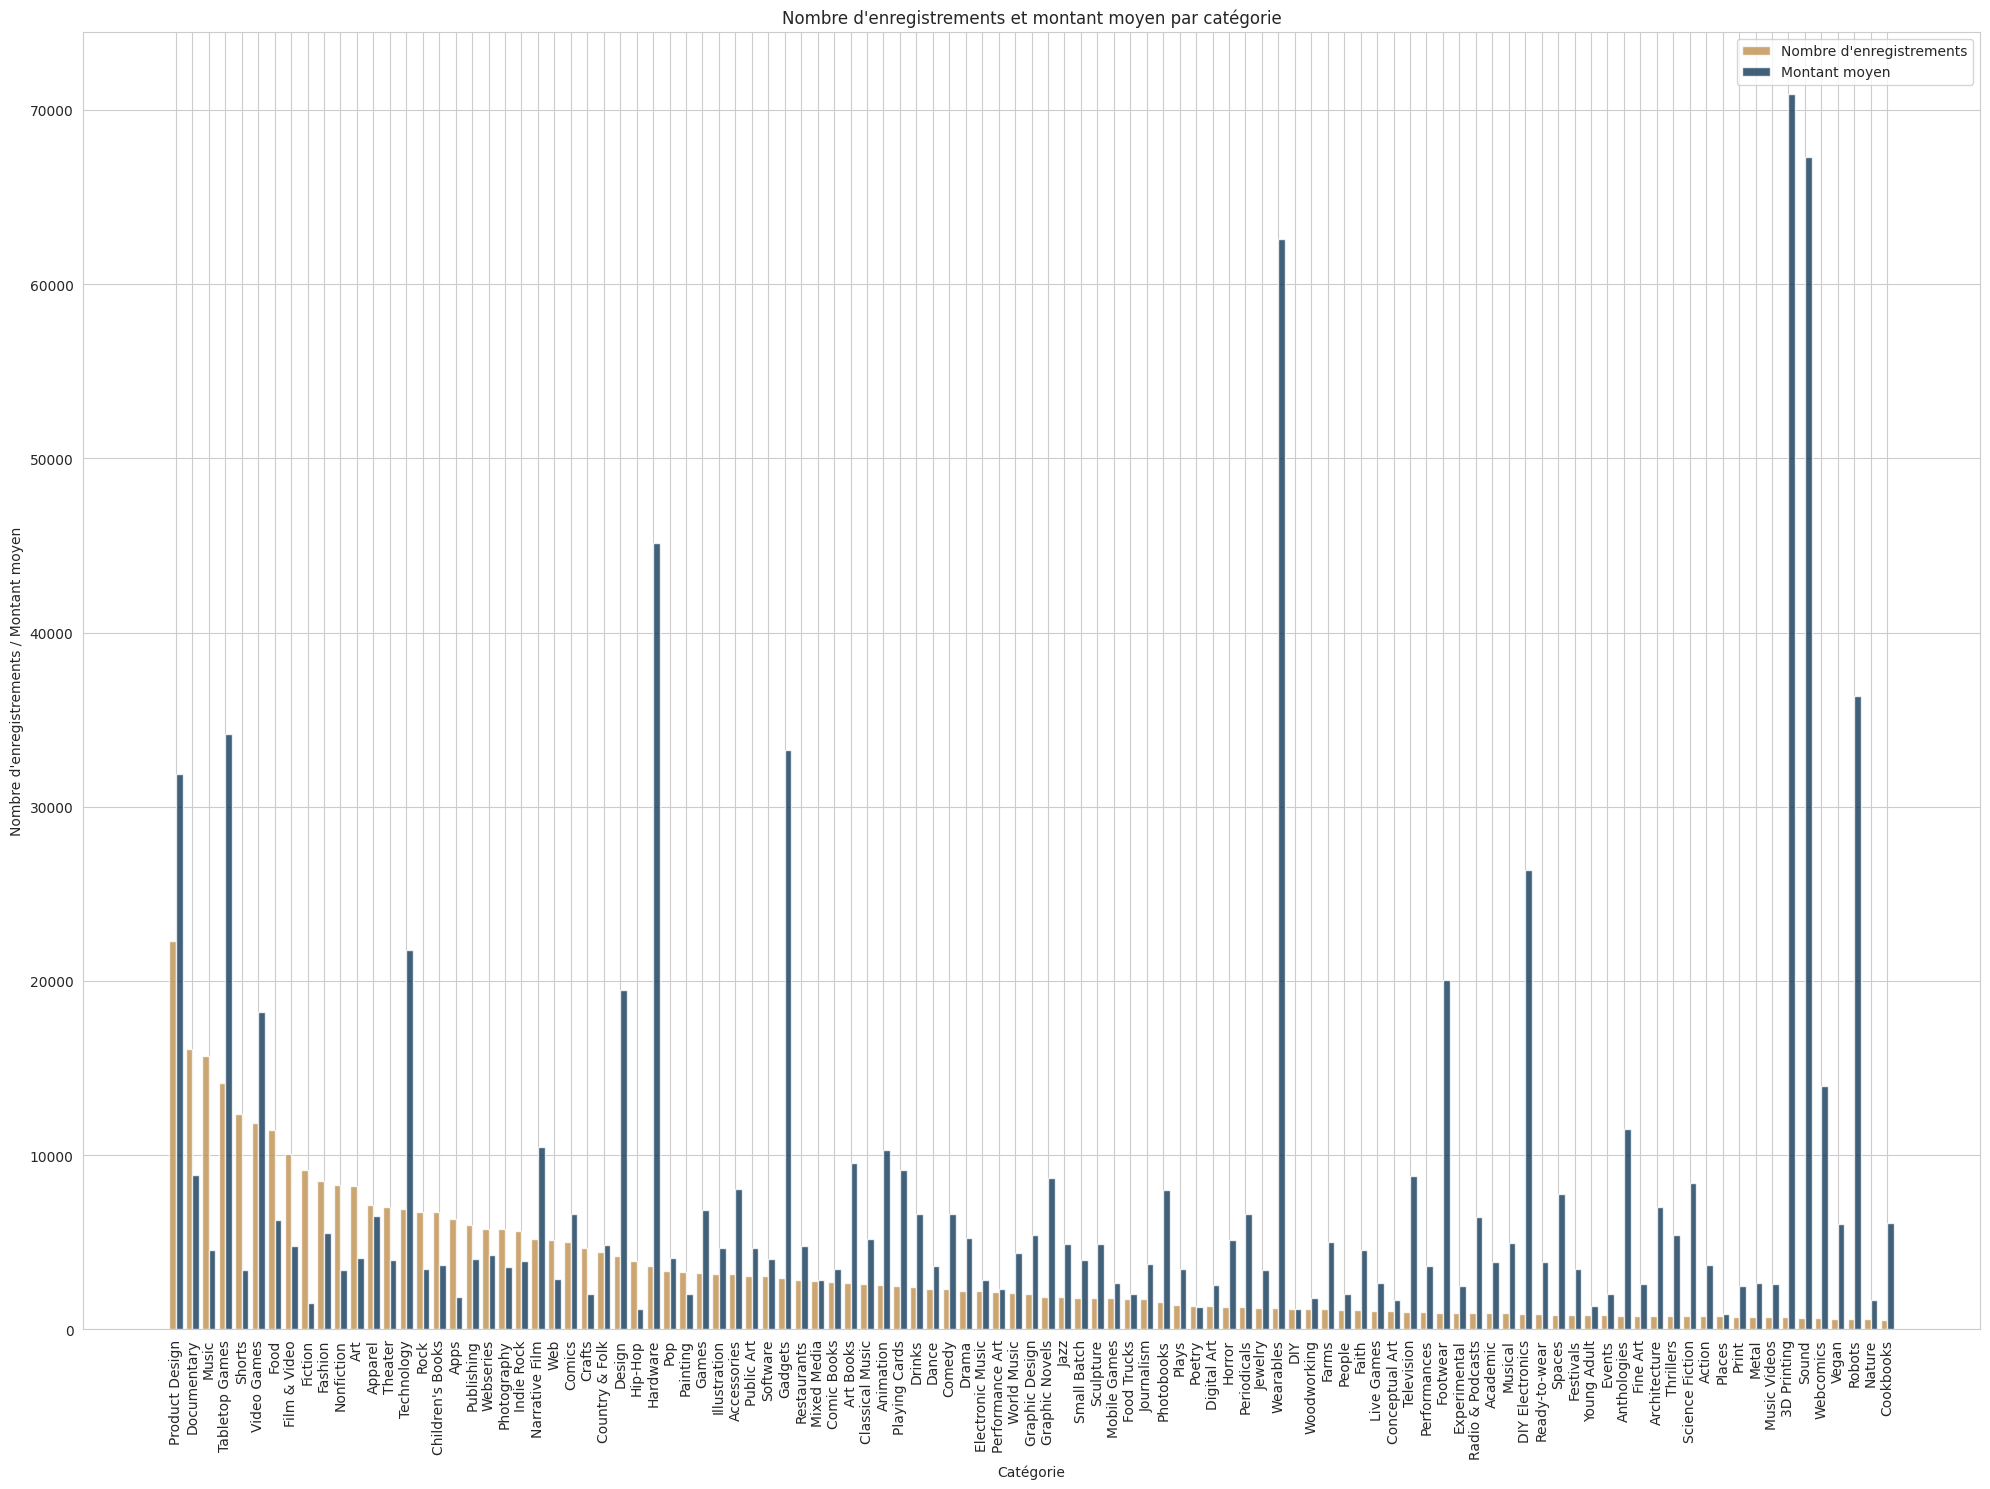

In [71]:
# Calculer les montants moyens par catégorie
montant_moyen = df.groupby("categorie")["promesse"].mean()

# Sélectionner les catégories à garder (celles qui ont plus de 50 enregistrements)
categories_garder = nb_enregistrements[nb_enregistrements > 200].index

# Filtrer la variable montant_moyen pour ne garder que les catégories à garder et trier dans l'ordre des index de nb_enregistrements_filtre
montant_moyen_filtre = montant_moyen[categories_garder].loc[nb_enregistrements_filtre.index]

# Créer un graphique à barres avec les nombres d'enregistrements et les montants moyens par catégorie
fig, ax = plt.subplots(figsize=(20, 15))
bar_width = 0.4
opacity = 0.8
pos_ticks = np.arange(len(nb_enregistrements_filtre.index))




rects1 = ax.bar(pos_ticks - bar_width/2, nb_enregistrements_filtre, bar_width,
                alpha=opacity, color= couleurs[0], label="Nombre d'enregistrements")
rects2 = ax.bar(pos_ticks + bar_width/2, montant_moyen_filtre, bar_width,
                alpha=opacity, color=couleurs[1], label='Montant moyen')

ax.set_xlabel('Catégorie')
ax.set_ylabel("Nombre d'enregistrements / Montant moyen")
ax.set_title("Nombre d'enregistrements et montant moyen par catégorie")
ax.set_xticks(pos_ticks)
ax.set_xticklabels(nb_enregistrements_filtre.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


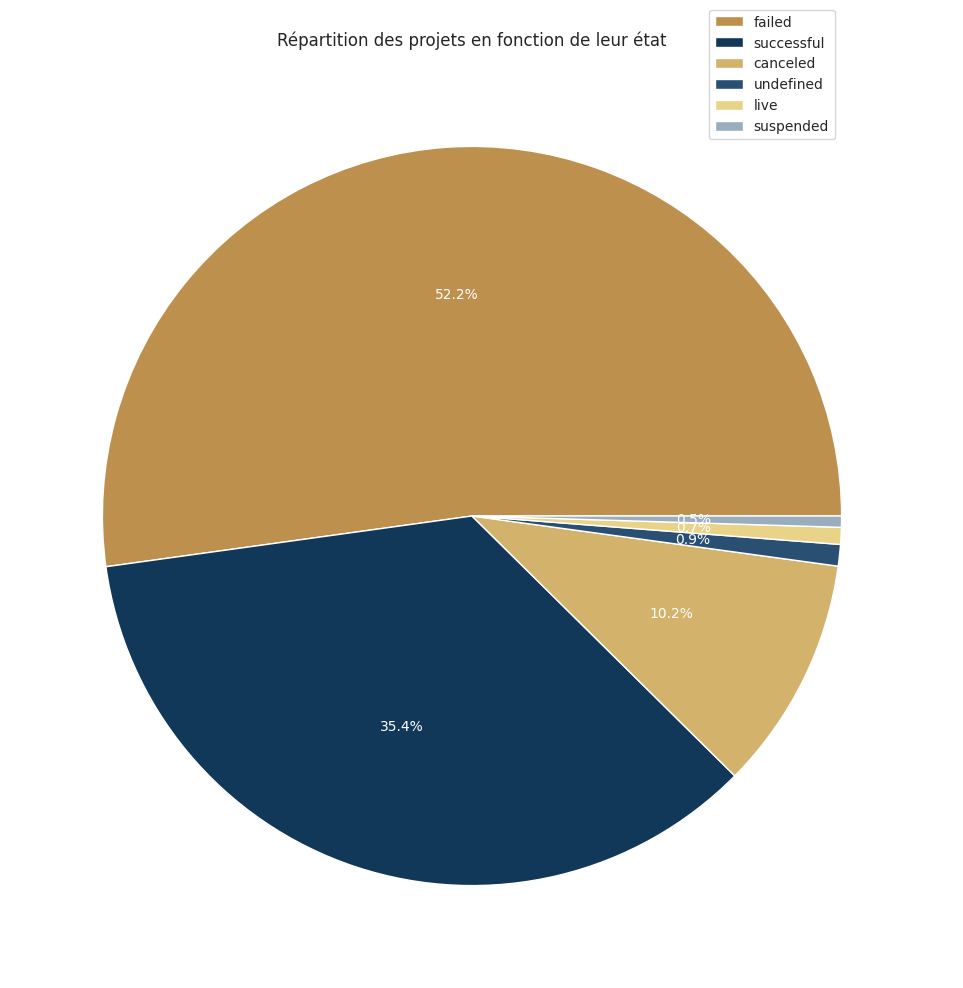

In [87]:
# Compter le nombre de projets en fonction de leur état
etat_counts = df['etat'].value_counts()

# Configurer le style visuel avec Seaborn
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Créer un diagramme circulaire avec Seaborn
plt.figure(figsize=(12, 12))
plt.pie(etat_counts, labels=etat_counts.index, colors=couleurs, autopct='%1.1f%%', textprops={'color':'white'})
plt.title('Répartition des projets en fonction de leur état')

# Ajouter une légende en haut à droite
leg = plt.legend(loc='lower right', bbox_to_anchor=(0.9, 0.9))

plt.show()